# Quantum Gates

In the introduction we saw several facts about quantum gates, let's do a quick recap about them:
- Quantum gates can be seen as rotations around the bloch sphere.
- For some quantum gates, if you apply the same gate twice you'll get the original state of the qubit before the application of the first gate.

Now then, if quantum gates are just rotations around the bloch sphere how can we rotate by any arbitrary $\theta$ degrees?. To answer this question let's look at this fact; we can represent every one qubit gate with the following matrix:

$U_3(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
     \end{bmatrix}$. 
     
For example if wanted to represent an X Gate the parameters will be $\theta = \pi, \lambda = 0, \phi = 0$. Let's do this in code:

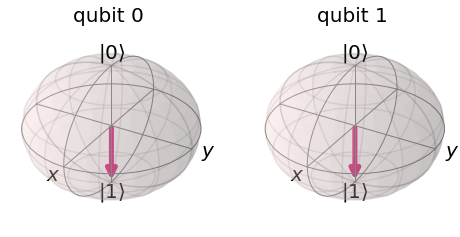

In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from numpy import pi
qc = QuantumCircuit(2)
qc.x(0)
qc.u3(pi,0,0,1)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

As you can see the application of the X gate on qubit 0 and the application of the U3 gate yields the same results.





This is an important fact because quantum computers operates only with U and CX gates. So in order to run your circuits in a real quantum computer qiskit must do a proccess called transpile. Transpiling is the process in which qiskit takes a circuit and then it transforms it to an equivalent circuit using only U and CX gates. Please note that the transpile proccess doesn't guarantee that you'll obtain the circuit that uses the less amount of gates. For example we would like to convert the following circuit to it's equivalent using only U3 and CX gates:

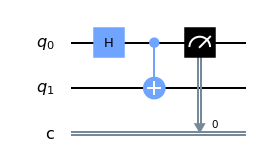

In [2]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.cx(0,1)
qc.measure(0,0)
qc.draw(output='mpl')

It's equivalent is the following:

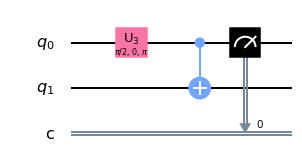

In [3]:
trans_qc = transpile(qc, basis_gates = ['cx','u3'])
trans_qc.draw(output = 'mpl')

However, this may seem to be too overkill because a lot of algorithms just use the same gates over and over. So, the most used gates are the following (apart from the ones in the introduction): 

## The Z-Gate

The Z gate does a rotation around the bloch sphere on the **z-basis** of 180 degrees. It's kinda the equivalent of the X-Gate but for a different basis. Its matrix representation is the following:
$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1|$

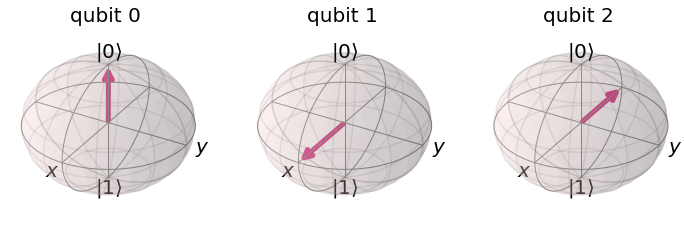

In [8]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from numpy import pi
qc = QuantumCircuit(3)
qc.h(1)
qc.h(2)
qc.z(2)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

As you can see in the example, we first applied an H-Gate because a rotation of 180° around the z axis wouldn't make anything if we started in the $|0 \rangle$ state. And the result of the application of the Z gate is represented in qubit 2 and it is what we expected to be: A rotation of 180°.

## The Y-Gate

The Y gate does a rotation around the bloch sphere on the **y-basis** of 180 degrees. It's kinda the equivalent of the X-Gate and Z-Gate but for a different basis.

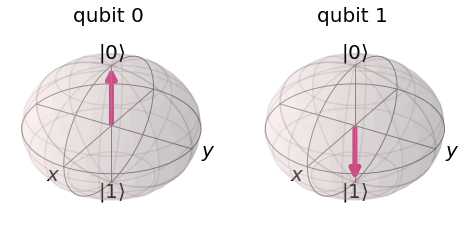

In [14]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
qc = QuantumCircuit(2)
qc.y(1)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

Wait, it's not the same rotation we saw with the X-Gate? At first glance it may appear so, but let's look at its matrix definition to clear thing up:

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0| $

Now you can see why it appear to be the same rotation.

## The T Gate

The T gate does a rotation around the bloch sphere on the **z-basis** of 45 degrees. Its matrix representation is the following:

$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}$

But, the problem with this gate is that if we apply it twice we won't get the original qubit because we will have a 90° rotation around the Z-Axis (to get the original qubit we would need a 180° rotation). So, to get the original qubit state we will need to apply the inverse of this gate which is the $T^\dagger$. Its matrix is the following:

$T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$

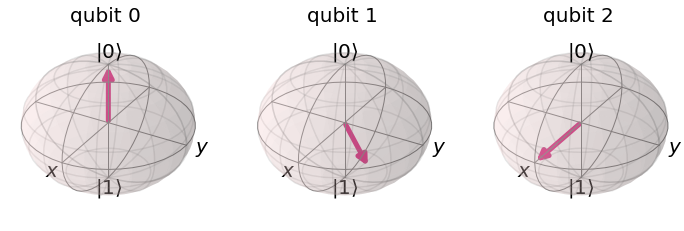

In [12]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from numpy import pi
qc = QuantumCircuit(3)
qc.h(1)
qc.t(1)
qc.h(2)
qc.t(2)
qc.tdg(2)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

As you can see a rotation of about 45° happens on the qubit one after we applied the t gate. A rotation of about 135° happens after we applied the inverse of the T gate.

## The toffoli gate

When we presented the CNOT gate we said something like: if the controller qubit is one then when apply an X-Gate on the target qubit. Now the question is, How can we construct a CNOT Gate which have two controller qubits. The answer is the toffoli gate. There are several ways to define a toffoli gate but we'll construct it accordingly to [1]. The main idea is the following:

- If the controller qubits are 0 then nothing is going to happen because no CNOT gate will be applied and the T gates are going to cancell with the T dagger gates.
- If one of the controller qubits are 1, then the T gates are going to cancell the rotation applied by the CNOT Gate.
- If the two of the controller qubits are one then we are going to apply a rotation equivalent to the rotation of a Z-Gate. And after the application of the H-Gates we will have the desired result.

You can see the code and the result of an execution down below:

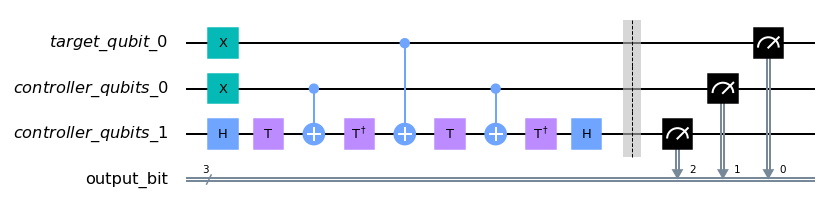

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import lookuptable_decoding
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
from qiskit.visualization import plot_histogram
import random

backend = Aer.get_backend('qasm_simulator')
cb = QuantumRegister(1,'target_qubit')
lq = QuantumRegister(2,'controller_qubits')
out = ClassicalRegister(3,'output_bit')
mycircuit = QuantumCircuit(cb,lq,out)
mycircuit.x(0)
mycircuit.x(1)
mycircuit.h(2)
mycircuit.t(2)
mycircuit.cx(1,2)
mycircuit.tdg(2)
mycircuit.cx(0,2)
mycircuit.t(2)
mycircuit.cx(1,2)
mycircuit.tdg(2)
mycircuit.h(2)
mycircuit.barrier()
mycircuit.measure(2,2)
mycircuit.measure(1,1)
mycircuit.measure(0,0)
mycircuit.draw(output="mpl")

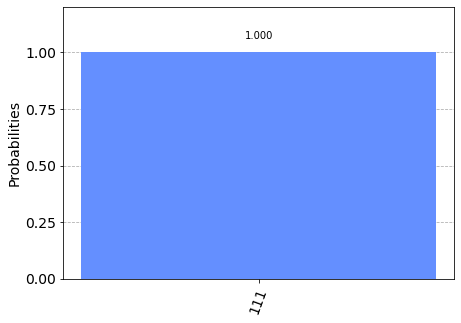

In [14]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

It works great!. As you can see the result higlights that in the precence of two 1 qubits the third one flips to a 1 qubit. But doing this is a tedious proccess, luckly for us qiskit has a library that enable us to call  directly to the toffoly gate without having to implement anything.

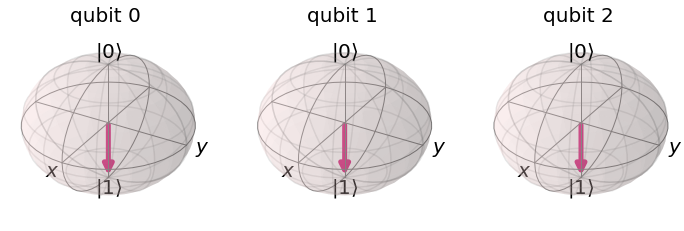

In [17]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from numpy import pi
qc = QuantumCircuit(3)
qc.x(0)
qc.x(1)
#toffoli gate
qc.ccx(0,1,2)
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

Everything is perfect, however you may wonder if you can have a toffoli gate with 3 or 4 or 5.... controller qubits. The answer is yes but we won't see them (nor use them) in this blog.

## References:

Maslov, Dmitri. (2015). On the advantages of using relative phase Toffolis with an application to multiple control Toffoli optimization. Physical Review A. 93. 10.1103/PhysRevA.93.022311.

https://www.youtube.com/watch?v=O2WcZS4yO1Q&ab_channel=Qiskit

https://qiskit.org/textbook/ch-states/single-qubit-gates.html